Linear advection

In [2]:
# Numerical schemes for simulating linear advection for outer code
# linearAdvect.py 

# If you are using Python 2.7 rather than Python 3, import various
# functions from Python 3 such as to use real number division
# rather than integer division. ie 3/2  = 1.5  rather than 3/2 = 1
#from __future__ import absolute_import, division, print_function

# The numpy package for numerical functions and pi
import numpy as np

def FTCS(phiOld, c, nt):
    "Linear advection of profile in phiOld using FTCS, Courant number c"
    "for nt time-steps"
    
    nx = len(phiOld)

    # new time-step array for phi
    phi = phiOld.copy()

    # FTCS for each time-step
    for it in range(nt):
        # Loop through all space using remainder after division (%)
        # to cope with periodic boundary conditions
        for j in range(nx):
            phi[j] = phiOld[j] - 0.5*c*\
                     (phiOld[(j+1)%nx] - phiOld[(j-1)%nx])
        
        # update arrays for next time-step
        phiOld = phi.copy()

    return phi

diagnostics

In [3]:
# Various function for plotting results and for calculating error measures


# If you are using Python 2.7 rather than Python 3, import various
# functions from Python 3 such as to use real number division
# rather than integer division. ie 3/2  = 1.5  rather than 3/2 = 1
#from __future__ import absolute_import, division, print_function

import numpy as np


def l2ErrorNorm(phi, phiExact):
    "Calculates the l2 error norm (RMS error) of phi in comparison to"
    "phiExact"
    
    # calculate the error and the RMS error norm
    phiError = phi - phiExact
    l2 = np.sqrt(sum(phiError**2)/sum(phiExact**2))

    return l2


def lInfErrorNorm(phi, phiExact):
    "Calculates the linf error norm (maximum normalised error) in comparison"
    "to phiExact"
    phiError = phi - phiExact
    return np.max(np.abs(phiError))/np.max(np.abs(phiExact))


Initial conditions

In [4]:
# Various different initial conditions for linear advection

# If you are using Python 2.7 rather than Python 3, import various
# functions from Python 3 such as to use real number division
# rather than integer division. ie 3/2  = 1.5  rather than 3/2 = 1
#from __future__ import absolute_import, division, print_function

import numpy as np

def squareWave(x,alpha,beta):
    "A square wave as a function of position, x, which is 1 between alpha"
    "and beta and zero elsewhere. The initialisation is conservative so"
    "that each phi contains the correct quantity integrated over a region"
    "a distance dx/2 either side of x"
    
    phi = np.zeros_like(x)
    
    # The grid spacing (assumed uniform)
    dx = x[1] - x[0]
    
    # Set phi away from the end points (assume zero at the end points)
    for j in xrange(1,len(x)-1):
        # edges of the grid box (using west and east notation)
        xw = x[j] - 0.5*dx
        xe = x[j] + 0.5*dx
        
        #integral quantity of phi
        phi[j] = max((min(beta, xe) - max(alpha, xw))/dx, 0)

    return phi


def cosBell(x, alpha=0, beta=0.5):
    "Function defining a cosine bell as a function of position, x"
    "between alpha and beta with default parameters 0, 0.5"
### The lambda keyword lets you define a function in one line       ###
    width = beta - alpha
    bell = lambda x: 0.5*(1 - np.cos(2*np.pi*(x-alpha)/width))
### chooses bell(x) where condition is true, else chooses zeros     ###
    return np.where((x<beta) & (x>=alpha), bell(x), 0.)


def mixed(x, a, b, c, d):
    "A square wave in one location and a cosine bell in another"
    return 1-(1-cosBell(x, a, b))*(1-squareWave(x, c, d))


Linear advection

FTCS l2 error norm =  0.02340576783852749
FTCS linf error norm =  0.02570298678470856
press return to save file and continue


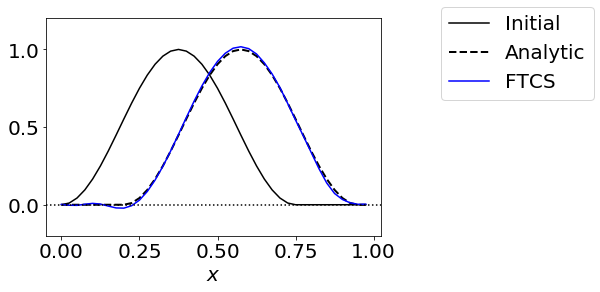

In [7]:
#!/usr/bin/python3

# Outer code for setting up the linear advection problem on a uniform
# grid and calling the function to perform the linear advection and plot.

### Copy out most of this code. Code commented with 3#s (like this) ###
### is here to help you to learn python and need not be copied      ###

### The command at the top means that this python function can be  ###
### run directly from the command line (you will also need to do   ###
### "chmod u+x linearAdvect.py" in unix or linux and then execute: ###
### ./linearAdvect.py                                              ###

### Note that blocks are defined by indentation in Python. You     ###
### should never mix tabs and spaces for indentation - use 4 spaces.###
### Setup your text editor to insert 4 spaces when you press tab    ###

### If you are using Python 2.7 rather than Python 3, import various###
### functions from Python 3 such as to use real number division     ###
### rather than integer division. ie 3/2  = 1.5  rather than 3/2 = 1###
#from __future__ import absolute_import, division, print_function

### The matplotlib package contains plotting functions              ###
import matplotlib.pyplot as plt

# read in all the linear advection schemes, initial conditions and other
# code associated with this application
###from initialConditions import *
###from advectionSchemes import *
###from diagnostics import *

### The main code is inside a function to avoid global variables    ###
def main():
    "Advect the initial conditions using various advection schemes and"
    "compare results"

    # Parameters
    xmin = 0
    xmax = 1
    nx = 40
    nt = 40
    c = 0.2

    # Derived parameters
    dx = (xmax - xmin)/nx
    
    # spatial points for plotting and for defining initial conditions
    x = np.arange(xmin, xmax, dx)

    # Initial conditions
    phiOld = cosBell(x, 0, 0.75)
    # Exact solution is the initial condition shifted around the domain
    phiAnalytic = cosBell((x - c*nt*dx)%(xmax - xmin), 0, 0.75)

    # Advect the profile using finite difference for all the time steps
    phiFTCS = FTCS(phiOld.copy(), c, nt)
    
    # Calculate and print out error norms
    print("FTCS l2 error norm = ", l2ErrorNorm(phiFTCS, phiAnalytic))
    print("FTCS linf error norm = ", lInfErrorNorm(phiFTCS, phiAnalytic))

    # Plot the solutions
    font = {'size'   : 20}
    plt.rc('font', **font)
    plt.figure(1)
    plt.clf()
    plt.ion()
    plt.plot(x, phiOld, label='Initial', color='black')
    plt.plot(x, phiAnalytic, label='Analytic', color='black', 
             linestyle='--', linewidth=2)
    plt.plot(x, phiFTCS, label='FTCS', color='blue')
    plt.axhline(0, linestyle=':', color='black')
    plt.ylim([-0.2,1.2])
    plt.legend(bbox_to_anchor=(1.15 , 1.1))
    plt.xlabel('$x$')
    input('press return to save file and continue')
    plt.savefig('changeThisName.pdf')
    plt.show()

### Run the function main defined in this file                      ###
main()
